In [97]:
import numpy as np
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astroquery.mast import Observations
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
#Insert TIC ID and BJD
tic_id = '167814740'
bjd = 2458344.875

tbjd = bjd - 2457000.00
obsTable = Observations.query_criteria(
    obs_collection = "TESS",
    dataproduct_type = ["timeseries"],
    target_name = tic_id,
    sequence_number=1)
products = Observations.get_product_list(obsTable)
manifest = Observations.download_products(products, extension = "fits")





INFO: Found cached file ./mastDownload/TESS/tess2018206045859-s0001-0000000167814740-0120-s/tess2018206045859-s0001-0000000167814740-0120-s_lc.fits with expected size 2039040. [astroquery.query]
INFO: Found cached file ./mastDownload/TESS/tess2018206045859-s0001-0000000167814740-0120-s/tess2018206045859-s0001-0000000167814740-0120-s_tp.fits with expected size 49184640. [astroquery.query]


In [180]:
fits_lc = manifest[0][0]
fits.info(fits_lc)
fits.getdata(fits_lc, ext=1)

Filename: ./mastDownload/TESS/tess2018206045859-s0001-0000000167814740-0120-s/tess2018206045859-s0001-0000000167814740-0120-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


FITS_rec([(1325.2936085 , -0.00075415, 70444, 439.359  , 3.7041054, 424.76752, 1.3259917,       nan,       nan, 8, nan, nan, nan, nan, 1821.20380029, 0.00415322, 728.27571099, 0.00409846,         nan,         nan),
          (1325.29499738, -0.00075416, 70445, 465.7037 , 3.743253 , 425.7101 , 1.3276252, 740.1587 , 6.1510315, 0, nan, nan, nan, nan, 1821.22664795, 0.00392451, 728.30414588, 0.00388382, -0.04718027, -0.02255802),
          (1325.29638625, -0.00075417, 70446, 466.3088 , 3.743197 , 424.68973, 1.3269012, 726.26855, 6.15094  , 0, nan, nan, nan, nan, 1821.23798153, 0.00390999, 728.31871034, 0.00386988, -0.02125226,  0.01026588),
          ...,
          (1353.17268055, -0.00083761, 90517, 444.62335, 3.781661 , 464.25024, 1.3679848, 726.72516, 6.214145 , 0, nan, nan, nan, nan, 1821.24008904, 0.00416229, 728.26003867, 0.00415242, -0.02083492, -0.10000297),
          (1353.17406943, -0.00083762, 90518, 453.07227, 3.7922955, 461.97726, 1.3651083, 730.08624, 6.2316203, 0, nan, nan, 

In [181]:
#Stores HDU data into variables for plotting
with fits.open(fits_lc, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

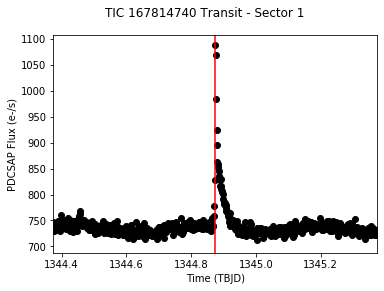

In [182]:
#PLOT LIGHT CURVE
t0 = tbjd #transit time

fig, ax = plt.subplots()

ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

ax.set_xlim(t0-0.5, t0 + 0.5)


ax.axvline(x=t0, color = 'red')

fig.suptitle("TIC " + str(tic_id) + " Transit - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

plt.subplots_adjust(left=0.15)
plt.show()